Import core libraries for data process and visualization

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create a list of seasons and list of teams, the team names must match how they are presented on https://www.pro-football-reference.com/teams/

In [6]:
seasons_list = [str(season) for season in range(2010,2025)]
print(f'Number of seasons = {len(seasons_list)}')

team_names_list = ['crd','atl','rav','buf','car','chi','cin','cle','dal','den','det','gnb','htx','clt','jax','kan','sdg','ram','rai','mia','min','nwe','nor','nyg','nyj','phi','pit','sea','sfo','tam','oti','was']

print(f'Number of teams = {len(team_names_list)}')

Number of seasons = 15
Number of teams = 32


Scrape Pro-Football_Reference for team data. Iterate through every season by team and pull their offensive and defensive data.

In [ ]:
import random
import time
nfl_df = pd.DataFrame()

for season in seasons_list:

  for team in team_names_list:
    url = 'https://www.pro-football-reference.com/teams/' + team + '/' + season + '/gamelog/'
    print(url)

    offense_df = pd.read_html(url, header = 1, attrs={'id':'table_pfr_team-year_game-logs_team-year-regular-season-game-log'})[0]
    
    defense_df = pd.read_html(url, header = 1, attrs={'id':'table_pfr_team-year_game-logs_team-year-regular-season-opponent-game-log'})[0]
    
    team_df = pd.concat([offense_df,defense_df],axis=1)

    team_df.insert(loc=0,column='Season',value=season)
    team_df.insert(loc=2,column='Team',value=team)

    nfl_df = pd.concat([nfl_df,team_df], ignore_index=True)
    
    time.sleep(random.randint(7,8))

print(nfl_df)

Note: If the scraping fails try two things.

1: increase the sleep timer so as to not time out on pro-football-reference.com . See this website for updates on their web scraping rules. https://www.sports-reference.com/bot-traffic.html

2: Use the data I posted directly in the GitHub repository instead

To ensure reproducibility and avoid repeated web scraping, save the scraped data to a CSV file below. If you have the data already you can skip the scraping and this step

In [ ]:
if not nfl_df.empty:
    nfl_df.to_csv('team_stats_no_odds.csv', index=False)
    print('Data saved to team_stats_no_odds.csv')
else:
    print('Warning: nfl_df is empty. CSV not saved')


Data saved to team_stats_no_odds.csv


In [ ]:
# Genereate lists and dataframes to scrape odds
#This list of team names must match the way team names are displayed on sports odds history
odds_team_names = ['ARZ', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GBP', 'HOU', 'IND', 'JAC', 'KCC', 'LAC', 'LAR', 'LVR', 'MIA', 'MIN', 'NEP', 'NOS', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SFF', 'TBB', 'TEN', 'WAS']

#create pre-2010s odds DF
odds_df = pd.DataFrame()
#create 2010s betting DF
twentytens_odds_df = pd.DataFrame()
#create final odds df
total1_odds_df = pd.DataFrame()

Iterate through each team and grab all of their betting and odds data and place it into one DF. If this does not work, check sportsoddhistory.com for their scraping rules and uncomment the time.sleep in order to ensure that you do not go over their limit.

In [ ]:
for team in odds_team_names:
  url = 'https://www.sportsoddshistory.com/nfl-game-team/?tm=' + team
  tens_url = 'https://www.sportsoddshistory.com/nfl-game-team/?tm='+ team + '&d=2010#2019'
  print(url)
  print(tens_url)
  odds_df = pd.read_html(url)
  twentytens_odds_df = pd.read_html(tens_url)
  # Combine 2000 and 2010 data
  odds_df = pd.concat([odds_df[2],twentytens_odds_df[2]], ignore_index=True)
  
  odds_df.insert(loc=2,column='Team',value=team)
  
  total1_odds_df = pd.concat([total1_odds_df,odds_df], ignore_index=True)

  #time.sleep(random.randint(3,4))

#odds_df.head(20)

https://www.sportsoddshistory.com/nfl-game-team/?tm=ARZ
https://www.sportsoddshistory.com/nfl-game-team/?tm=ARZ&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=ATL
https://www.sportsoddshistory.com/nfl-game-team/?tm=ATL&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=BAL
https://www.sportsoddshistory.com/nfl-game-team/?tm=BAL&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=BUF
https://www.sportsoddshistory.com/nfl-game-team/?tm=BUF&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=CAR
https://www.sportsoddshistory.com/nfl-game-team/?tm=CAR&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=CHI
https://www.sportsoddshistory.com/nfl-game-team/?tm=CHI&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=CIN
https://www.sportsoddshistory.com/nfl-game-team/?tm=CIN&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=CLE
https://www.sportsoddshistory.com/nfl-game-team/?tm=CLE&d=2010#2019
https://

,0,1,Team,2,3,4,5,6,7,8,9
0,1,Sun,WAS,"Sep 8, 2024",4:25,@,Tampa Bay Buccaneers,L 20-37,L +4,O 42.5,NaN
1,2,Sun,WAS,"Sep 15, 2024",1:00,NaN,New York Giants,W 21-18,W -1.5,U 43,NaN
2,3,Mon,WAS,"Sep 23, 2024",8:15,@,Cincinnati Bengals,W 38-33,W +7.5,O 46.5,NaN
3,4,Sun,WAS,"Sep 29, 2024",4:05,@,Arizona Cardinals,W 42-14,W +3.5,O 48.5,NaN
4,5,Sun,WAS,"Oct 6, 2024",1:00,NaN,Cleveland Browns,W 34-13,W -3,O 43.5,NaN
5,6,Sun,WAS,"Oct 13, 2024",1:00,@,Baltimore Ravens,L 23-30,P +7,O 50.5,NaN
6,7,Sun,WAS,"Oct 20, 2024",4:05,NaN,Carolina Panthers,W 40-7,W -10,U 51,NaN
7,8,Sun,WAS,"Oct 27, 2024",4:25,NaN,Chicago Bears,W 18-15,W -1.5,U 46.5,NaN
8,9,Sun,WAS,"Nov 3, 2024",1:00,@,New York Giants,W 27-22,W -4,O 44,NaN
9,10,Sun,WAS,"Nov 10, 2024",1:00,NaN,Pittsburgh Steelers,L 27-28,L -2,O 45.5,NaN


Ensure that the data is properly captured in the DF

In [18]:
total1_odds_df.head(20)

,0,1,Team,2,3,4,5,6,7,8,9
0,1,Sun,ARZ,"Sep 8, 2024",1:00,@,Buffalo Bills,L 28-34,W +6.5,O 46,NaN
1,2,Sun,ARZ,"Sep 15, 2024",4:05,NaN,Los Angeles Rams,W 41-10,W -1,O 47.5,NaN
2,3,Sun,ARZ,"Sep 22, 2024",4:25,NaN,Detroit Lions,L 13-20,L +3,U 51.5,NaN
3,4,Sun,ARZ,"Sep 29, 2024",4:05,NaN,Washington Commanders,L 14-42,L -3.5,O 48.5,NaN
4,5,Sun,ARZ,"Oct 6, 2024",4:05,@,San Francisco 49ers,W 24-23,W +7.5,U 49,NaN
5,6,Sun,ARZ,"Oct 13, 2024",1:00,@,Green Bay Packers,L 13-34,L +5.5,P 47,NaN
6,7,Mon,ARZ,"Oct 21, 2024",9:00,NaN,Los Angeles Chargers,W 17-15,W +1,U 44.5,NaN
7,8,Sun,ARZ,"Oct 27, 2024",1:00,@,Miami Dolphins,W 28-27,W +5,O 46.5,NaN
8,9,Sun,ARZ,"Nov 3, 2024",4:05,NaN,Chicago Bears,W 29-9,W -1.5,U 44.5,NaN
9,10,Sun,ARZ,"Nov 10, 2024",4:25,NaN,New York Jets,W 31-6,W +2,U 46,NaN


Checkpoint save a CSV again

In [19]:
total1_odds_df.to_csv('nfl_odds_data.csv', index=False)

In [35]:
# Create a DataFrame to hold the corrected odds data
correct_odds_df = pd.DataFrame()
# Reverse the order of the rows

correct_odds_df = total1_odds_df.iloc[::-1]
# Reset the index
correct_odds_df = correct_odds_df.reset_index(drop=True)
# Rename the columns
correct_odds_df = correct_odds_df.rename(columns={0:'Week',1:'Day',2:'Date',3:'Time',4:'H/A',5:'Opp',6:'Result',7:'Spread Result',8:'O/U',9:'Notes'})
# Convert the 'Date' column to datetime
correct_odds_df['Date'] = pd.to_datetime(correct_odds_df['Date'], errors='coerce')

In [36]:
# Clean the DataFrame
cleaned_odds_df = correct_odds_df[pd.to_numeric(correct_odds_df['Week'], errors='coerce').notna()]
cleaned_odds_df = cleaned_odds_df.reset_index(drop=True)
cleaned_odds_df['Week'] = cleaned_odds_df['Week'].astype(int)

cleaned_odds_df['H/A'] = cleaned_odds_df['H/A'].apply(lambda x: 1 if x == '@' else 0)
cleaned_odds_df.head()

,Week,Day,Team,Date,Time,H/A,Opp,Result,Spread Result,O/U,Notes
0,17,Sun,WAS,2011-01-02,4:16,0,New York Giants,L 14-17,W +4,U 44.5,NaN
1,16,Sun,WAS,2010-12-26,1:03,1,Jacksonville Jaguars,W 20-17 (OT),W +6.5,U 45,NaN
2,15,Sun,WAS,2010-12-19,1:03,1,Dallas Cowboys,L 30-33,W +9.5,O 44.5,NaN
3,14,Sun,WAS,2010-12-12,1:03,0,Tampa Bay Buccaneers,L 16-17,W +1.5,U 41.5,NaN
4,13,Sun,WAS,2010-12-05,1:02,1,New York Giants,L 7-31,L +7.5,U 43,NaN


In [33]:
# Rename the columns
working_nfl_df = pd.read_csv('team_stats_no_odds.csv')
working_nfl_df = working_nfl_df.rename(columns={'Unnamed: 5':'H/A'})
# Convert the 'H/A' column to numeric
working_nfl_df['H/A'] = working_nfl_df['H/A'].apply(lambda x: 1 if x == '@' else 0)
working_nfl_df.dropna(subset=['Week'], inplace=True)

In [ ]:
# Convert the 'Date' column to datetime
cleaned_odds_df['Date'] = pd.to_datetime(cleaned_odds_df['Date'], errors='coerce')
# Convert the 'Date' column to datetime
working_nfl_df['Date'] = pd.to_datetime(working_nfl_df['Date'], errors='coerce')

# Map team abbreviations to their correct abbreviation
team_map = {'ARZ':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'KCC':'kan',
            'LAC':'sdg',
            'LAR':'ram',
            'LVR':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NOS':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'TBB':'tam',
            'TEN':'oti',
            'WAS':'was'
            }
cleaned_odds_df['Team'] = cleaned_odds_df['Team'].apply(lambda x: team_map.get(x, x))

# Ensure both DataFrames have 'Date' and 'Team' columns in the same format
working_nfl_df['Date'] = pd.to_datetime(working_nfl_df['Date'])
cleaned_odds_df['Date'] = pd.to_datetime(cleaned_odds_df['Date'])

# Merge the two DataFrames on 'Date' and 'Team'
merged_df = pd.merge(working_nfl_df, cleaned_odds_df, on=['Date', 'Team'], how='left')

# Check the result
merged_df.head()

,Season,Rk,Team,Gtm,Week_x,Date,Day_x,H/A_x,Opp_x,Rslt,...,ToP.1,Week_y,Day_y,Time,H/A_y,Opp_y,Result,Spread Result,O/U,Notes
0,2010,1.0,crd,1.0,1.0,2010-09-12,Sun,1,STL,W,...,32:51,1,Sun,4:15,1,St Louis Rams,W 17-13,W -3,U 39.5,NaN
1,2010,2.0,crd,2.0,2.0,2010-09-19,Sun,1,ATL,L,...,39:13,2,Sun,1:03,1,Atlanta Falcons,L 7-41,L +7,O 43.5,NaN
2,2010,3.0,crd,3.0,3.0,2010-09-26,Sun,0,OAK,W,...,32:58,3,Sun,4:15,0,Oakland Raiders,W 24-23,L -5.5,O 39,NaN
3,2010,4.0,crd,4.0,4.0,2010-10-03,Sun,1,SDG,L,...,34:58,4,Sun,4:15,1,San Diego Chargers,L 10-41,L +9.5,O 46.5,NaN
4,2010,5.0,crd,5.0,5.0,2010-10-10,Sun,0,NOR,W,...,30:01,5,Sun,4:05,0,New Orleans Saints,W 30-20,W +7,O 45.5,NaN


In [37]:
#save a checkpoint
merged_df.to_csv('nfl_data_with_odds_data.csv', index=False)

In [40]:
combined_odds_stats_df = pd.read_csv('nfl_data_with_odds_data.csv')
#work_toclean_df.head()
#copy_toclean = work_toclean_df.copy()
# Drop unnecessary columns
combined_odds_stats_df.drop(columns=['Rk','H/A_x','Rk.1','Gtm.1','Week.1','Date.1','Unnamed: 5.1','Opp.1','Rslt.1','Pts.1','PtsO.1','OT.1','Week_y','Day_y','Opp_y'],inplace = True)
# Rename columns
combined_odds_stats_df.rename(columns={'Week_x':'Week','Day_x':'Day','Opp_x':'Opp','Yds':'P_Yds','TD':'P_TD', 'Y/A':'P_Y/A','AY/A' : 'Adj_P_Y/A','Rate':'QBR','Yds.1':'Sk_Yds',
                    'Att.1':'R_Att','Yds.2':'R_Yds','TD.1':'R_TD','Y/A.1':'R_Y/A','Cmp.1':'Opp_Cmp','Att.2':'Opp_P_Att','Cmp%.1':'Opp_Cmp%'
                    ,'Yds.5':'Opp_P_Yds','TD.2':'Opp_P_TD','Y/A.2':'Opp_P_Y/A','AY/A.1':'Opp_Adj_P_A/YA','Rate.1':'Opp_QBR','Sk.1':'Def_Sk','Yds.1.1':'Def_Sk_Yds','Cmp.1':'Opp_Cmp'
                    ,'Att.1.1':'Opp_R_Att','Yds.2.1':'Opp_R_Yds','TD.1.1':'Opp_R_TD','Y/A.1.1':'Opp_R_Y/A','Ply.1':'Opp_Ply','Tot.1':'Opp_Tot','Y/P.1':'Opp_Y/P'
                    ,'FGA.1':'Opp_FGA','FGM.1':'Opp_FGM','XPA.1':'Opp_XPA','Pnt.1':'Opp_Pnt','Yds.3.1':'Opp_Pnt_Yds'
                    ,'Pass.1':'Opp_1D_P','Rsh.1':'Opp_1D_R','Pen.2':'Opp_1D_Pen','1stD.1':'Opp_1D_Tot','3DConv.1':'Opp_3DConv','3DAtt.1':'Opp_3DAtt'
                    ,'4DConv.1':'Opp_4DConv','4DAtt.1':'Opp_4DAtt','Pen.1.1':'Opp_Pen','Yds.4.1':'Opp_PenYds','FL.1':'Opp_FL','Int.1':'Opp_Int','TO.1':'Opp_TO','ToP.1':'Opp_ToP'},inplace=True)
col_tomove = combined_odds_stats_df.pop('H/A_y')
combined_odds_stats_df.insert(5,'H/A',col_tomove)


In [ ]:
#Generate 
combined_odds_stats_df['Spread Result'] = combined_odds_stats_df['Spread Result'].str[2:].str.upper().str.strip().replace('PK', '0')

combined_odds_stats_df['O/U'] = combined_odds_stats_df['O/U'].str[2:].str.upper().str.strip().replace('PK', '0')

combined_odds_stats_df['Total Score'] = combined_odds_stats_df['Pts'] + combined_odds_stats_df['PtsO']

combined_odds_stats_df['O/U'] = combined_odds_stats_df['O/U'].astype(float)

def get_ou_result(row):
    if row['Total Score'] > row['O/U']:
        return 'O'
    elif row['Total Score'] < row['O/U']:
        return 'U'
    else:
        return 'P'
combined_odds_stats_df['O/U Result'] = combined_odds_stats_df.apply(get_ou_result, axis=1)
combined_odds_stats_df = combined_odds_stats_df.rename(columns={'Notes': 'IsInternational'})
combined_odds_stats_df['IsInternational'] = combined_odds_stats_df['IsInternational'].apply(lambda x: 1 if pd.notna(x) else 0)

#combined_odds_stats_df.to_csv('final_fixed_final_nfl_data.csv', index=False)



In [ ]:
import pandas as pd
feature_df= pd.read_csv('/content/drive/MyDrive/Football Data/final_fixed_final_nfl_data.csv')
feature_df['Total TDs'] = feature_df['P_TD'] + feature_df['R_TD']
feature_df['Points Per Drive'] = feature_df['Pts'] / (feature_df['Pnt'] + feature_df['Total TDs'] + feature_df['FGA'] + feature_df['TO'])
feature_df.head()
feature_df['Yds Per Drive'] = feature_df['Tot']/ (feature_df['Pnt'] + feature_df['Total TDs'] + feature_df['FGA'] + feature_df['TO'])
feature_df.head()
feature_df['4D Success'] = feature_df['4DConv'] / feature_df['4DAtt']
feature_df.head()
feature_df['3D Success'] = feature_df['3DConv'] / feature_df['3DAtt']
feature_df['4D Success'] = feature_df['4D Success'].fillna(0)
feature_df['3D Success'] = feature_df['3D Success'].fillna(0)
feature_df['Pts per Play'] = feature_df['Pts'] / feature_df['Ply']
feature_df['Sk Rate'] = feature_df['Def_Sk'] / feature_df['Opp_P_Att']
feature_df['3d Stop Rate'] = 1- (feature_df['Opp_3DConv'] / feature_df['Opp_3DAtt'])
feature_df['4d Stop Rate'] = 1- (feature_df['Opp_4DConv'] / feature_df['Opp_4DAtt'])
feature_df['4d Stop Rate'] = feature_df['4d Stop Rate'].fillna(0)
feature_df['3d Stop Rate'] = feature_df['3d Stop Rate'].fillna(0)
feature_df['Pts Allowed per Play'] = feature_df['PtsO'] / feature_df['Opp_Ply']
feature_df['Yds Allowed per Play'] = feature_df['Opp_Tot'] / feature_df['Opp_Ply']
feature_df['Turnover Diff'] =  feature_df['Opp_TO'] - feature_df['TO']
feature_df['Turnover Percentage'] = feature_df['TO'] / feature_df['Ply']
feature_df['Defensive TO Percentage'] = feature_df['Opp_TO'] / feature_df['Opp_Ply']
#print(feature_df['ToP'].dtype)
def convert_time_to_minutes(time_str):
    try:
        if not isinstance(time_str, str):
            time_str = str(time_str)

        time_str = time_str.strip()
        parts = time_str.split(':')

        if len(parts) == 3:
            minutes, seconds,trailing = parts
            if float(trailing) == 0:
              total_minutes = float(minutes) + float(seconds) / 60
            else:
              total_minutes = (float(minutes) + float(seconds) / 60) + float(trailing) / (60 * 1000)
            return total_minutes
        elif len(parts) == 2:
            minutes, seconds = parts
            total_minutes = (float(minutes) + float(seconds) / 60)
            return total_minutes
        else:
            return float(time_str)
    except Exception as e:
        print(f"Error converting {time_str}: {e}")
        return None
feature_df['ToP_Minutes'] = feature_df['ToP'].apply(convert_time_to_minutes)
feature_df['ToP_Minutes'] = feature_df['ToP_Minutes'].fillna(0)
feature_df['Opp_ToP_Minutes'] = feature_df['Opp_ToP'].apply(convert_time_to_minutes)
feature_df['Opp_ToP_Minutes'] = feature_df['Opp_ToP_Minutes'].fillna(0)
feature_df['Pts Per Min of Poss'] = feature_df['Pts'] / feature_df['ToP_Minutes']
feature_df['Yds per Min of Poss'] = feature_df['Tot'] / feature_df['ToP_Minutes']
feature_df['ToP Ratio'] = feature_df['ToP_Minutes'] / (feature_df['ToP_Minutes'] + feature_df['Opp_ToP_Minutes'])
feature_df['Def Pts Allowed Per Min of Poss'] = feature_df['PtsO'] / feature_df['Opp_ToP_Minutes']
feature_df['Def Yds Allowed Per Min of Poss'] = feature_df['Opp_Tot'] / feature_df['Opp_ToP_Minutes']
feature_df.head(10)
#feature_df.to_csv('feature_nfl_data.csv', index=False)
feature_df['Date'] = pd.to_datetime(feature_df['Date'])
#feature_df['Season'] = feature_df['Date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)
feature_df.head(20)
feature_df = feature_df.sort_values(['Team', 'Season', 'Week']).reset_index(drop=True)
def rolling_average(data, columns, window_size):
    for col in columns:
        data[f'{col}_rollingavg{window_size}'] = data.groupby(['Team','Season'])[col].transform(lambda x: x.shift(1).rolling(window=window_size, min_periods=2).mean())

    return data

rolling_columns = ['Pts', 'PtsO', 'Tot', 'Opp_Tot', 'Points Per Drive', 'Yds Per Drive', 'Pts per Play', 'Y/P', 'Opp_Y/P', 'TO','Opp_TO', 'ToP_Minutes', 'Opp_ToP_Minutes'
                  , 'Turnover Diff', 'Turnover Percentage', 'Defensive TO Percentage', 'ToP_Minutes','Pts Per Min of Poss', 'Yds per Min of Poss', 'ToP Ratio', 'Def Pts Allowed Per Min of Poss', 'Def Yds Allowed Per Min of Poss',
                   '3DConv', '4DConv', '3D Success', '4D Success', '3d Stop Rate', '4d Stop Rate', 'Sk Rate' , 'Def Yds Allowed Per Min of Poss', 'Def Pts Allowed Per Min of Poss']
feature_df = rolling_average(feature_df, rolling_columns, 3)
feature_df = feature_df.fillna(0)
feature_df.head()


,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,Pts,...,ToP Ratio_rollingavg3,Def Pts Allowed Per Min of Poss_rollingavg3,Def Yds Allowed Per Min of Poss_rollingavg3,3DConv_rollingavg3,4DConv_rollingavg3,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3
0,2010,atl,1,1,2010-09-12,1,Sun,PIT,L,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,2010,atl,2,2,2010-09-19,0,Sun,ARI,W,41,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,2010,atl,3,3,2010-09-26,1,Sun,NOR,W,27,...,0.570347,0.402049,11.937435,8.500000,0.500000,0.511029,0.250000,0.857143,0.5,0.087995
3,2010,atl,4,4,2010-10-03,0,Sun,SFO,W,16,...,0.589278,0.561611,12.826791,8.666667,1.000000,0.507353,0.388889,0.722944,0.5,0.076207
4,2010,atl,5,5,2010-10-10,1,Sun,CLE,W,20,...,0.589787,0.557939,11.997058,8.333333,1.333333,0.501401,0.722222,0.651515,0.5,0.048163


In [ ]:
crd_2010 = feature_df[(feature_df['Team'] == 'crd') & (feature_df['Season'] == 2010)]
crd_2011 = feature_df[(feature_df['Team'] == 'crd') & (feature_df['Season'] == 2011)]
print("Cardinals 2010: ")
print(crd_2010['Sk Rate_rollingavg3'])
print("Cardinals 2011: ")
print(crd_2011['Sk Rate_rollingavg3'])

Cardinals 2010: 
1706    0.000000
1707    0.000000
1708    0.033807
1709    0.051950
1710    0.055701
1711    0.053832
1712    0.068280
1713    0.079073
1714    0.091803
1715    0.064610
1716    0.037943
1717    0.031159
1718    0.037481
1719    0.045611
1720    0.066206
1721    0.088263
Name: Sk Rate_rollingavg3, dtype: float64
Cardinals 2011: 
1722    0.000000
1723    0.000000
1724    0.065682
1725    0.086799
1726    0.059096
1727    0.067217
1728    0.041300
1729    0.052575
1730    0.073739
1731    0.076253
1732    0.056645
1733    0.040441
1734    0.060516
1735    0.105561
1736    0.106233
1737    0.088056
Name: Sk Rate_rollingavg3, dtype: float64


In [ ]:
decay_rate = 0.9
latest_season = 2024
season_weights = {year: decay_rate ** (latest_season - year) for year in range(2010,2025)}

feature_df['Season_Weight'] = feature_df['Season'].map(season_weights)
feature_df['Win'] = feature_df['Rslt'].map({'W': 1, 'L': 0}).fillna(0)
feature_df.head()
feature_df['Season_Wins'] = feature_df.groupby(['Team', 'Season'])['Win'].cumsum()
feature_df['Record'] = feature_df['Season_Wins'].astype(str) + '-' + (feature_df['Week'] - feature_df['Season_Wins']).astype(str)
feature_df['Win PCT'] = feature_df['Season_Wins'] / feature_df['Week']
#feature_df.drop(columns=['Wins'], inplace=True)
feature_df.head()


#feature_df.to_csv('big_nfl_data.csv', index=False)

,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,Pts,...,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3,Season_Weight,Win,Season_Wins,Record,Win PCT
0,2010,atl,1,1,2010-09-12,1,Sun,PIT,L,9,...,0.000000,0.000000,0.000000,0.0,0.000000,0.228768,0.0,0.0,0.0-1.0,0.000000
1,2010,atl,2,2,2010-09-19,0,Sun,ARI,W,41,...,0.000000,0.000000,0.000000,0.0,0.000000,0.228768,1.0,1.0,1.0-1.0,0.500000
2,2010,atl,3,3,2010-09-26,1,Sun,NOR,W,27,...,0.511029,0.250000,0.857143,0.5,0.087995,0.228768,1.0,2.0,2.0-1.0,0.666667
3,2010,atl,4,4,2010-10-03,0,Sun,SFO,W,16,...,0.507353,0.388889,0.722944,0.5,0.076207,0.228768,1.0,3.0,3.0-1.0,0.750000
4,2010,atl,5,5,2010-10-10,1,Sun,CLE,W,20,...,0.501401,0.722222,0.651515,0.5,0.048163,0.228768,1.0,4.0,4.0-1.0,0.800000


In [ ]:
team_map = {'ARZ':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'KCC':'kan',
            'LAC':'sdg',
            'LAR':'ram',
            'LVR':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NOS':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'TBB':'tam',
            'TEN':'oti',
            'WAS':'was'
            }

team_map2 ={'ARI':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'GNB':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'JAX':'jax',
            'KCC':'kan',
            'KAN':'kan',
            'LAC':'sdg',
            'SDG':'sdg',
            'LAR':'ram',
            'STL':'ram',
            'LVR':'rai',
            'OAK':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NWE':'nwe',
            'NOS':'nor',
            'NOR':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'SFO':'sfo',
            'TBB':'tam',
            'TAM':'tam',
            'TEN':'oti',
            'WAS':'was'
            }
#feature_df['Opp'] =
#feature_df['Opp'] = feature_df['Opp'].apply(lambda x: team_map.get(x, x))
feature_df['Opp'] = feature_df['Opp'].apply(lambda x: team_map2.get(x, x))
feature_df.tail(20)

,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,Pts,...,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3,Season_Weight,Win,Season_Wins,Record,Win PCT
7786,2023,was,15,16,2023-12-24,1,Sun,nyj,L,28,...,0.369841,0.533333,0.433013,0.000000,0.030303,0.9,0.0,4.0,4.0-12.0,0.250000
7787,2023,was,16,17,2023-12-31,0,Sun,sfo,L,10,...,0.297619,0.866667,0.549679,0.166667,0.030303,0.9,0.0,4.0,4.0-13.0,0.235294
7788,2023,was,17,18,2024-01-07,0,Sun,dal,L,10,...,0.265873,0.533333,0.581019,0.500000,0.042208,0.9,0.0,4.0,4.0-14.0,0.222222
7789,2024,was,1,1,2024-09-08,1,Sun,tam,L,20,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0-1.0,0.000000
7790,2024,was,2,2,2024-09-15,0,Sun,nyg,W,21,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0-1.0,0.500000
7791,2024,was,3,3,2024-09-23,1,Mon,cin,W,38,...,0.375000,1.000000,0.403846,0.250000,0.034524,1.0,1.0,2.0,2.0-1.0,0.666667
7792,2024,was,4,4,2024-09-29,1,Sun,crd,W,42,...,0.435185,1.000000,0.402564,0.166667,0.040560,1.0,1.0,3.0,3.0-1.0,0.750000
7793,2024,was,5,5,2024-10-06,0,Sun,cle,W,34,...,0.601852,1.000000,0.512121,0.277778,0.090055,1.0,1.0,4.0,4.0-1.0,0.800000
7794,2024,was,6,6,2024-10-13,1,Sun,rav,L,23,...,0.592048,1.000000,0.653147,0.222222,0.158610,1.0,0.0,4.0,4.0-2.0,0.666667
7795,2024,was,7,7,2024-10-20,0,Sun,car,W,40,...,0.517974,1.000000,0.653147,0.222222,0.166707,1.0,1.0,5.0,5.0-2.0,0.714286


In [ ]:
#elo rating
feature_df[feature_df['Week'] == 1][[col for col in feature_df.columns if 'rolling' in col]].isna().sum()
feature_df[(feature_df['Team'] == 'crd') & (feature_df['Season'] == 2010)][['Week','Pts','Pts_rollingavg3']]

initial_elo = 1500
decay_factor = .4
K = 50

elo_ratings = {}
last_season_elo = {}


def calculate_dynamic_k(team_elo, opponent_elo, base_K = 30):
  rating_diff = abs(team_elo - opponent_elo)

  if rating_diff > 300:
    return base_K * .6
  elif rating_diff < 100:
    return base_K * 1.5
  else:
    return base_K

def update_elo(team, opponent, result, elo_ratings, base_K=30):
  team_elo = elo_ratings.get(team, initial_elo)
  opponent_elo = elo_ratings.get(opponent, initial_elo)

  K = calculate_dynamic_k(team_elo, opponent_elo, base_K)

  expected_team = 1 / (1 + 10 ** ((opponent_elo - team_elo) / 400))
  expected_opponent = 1 / (1 + 10 ** ((team_elo - opponent_elo) / 400))

  if result == 'W':
    actual_team = 1
    actual_opponent = 0
  elif result == 'L':
    actual_team = 0
    actual_opponent = 1
  else:
    actual_team = 0.5
    actual_opponent = 0.5

  elo_ratings[team] = team_elo + K * (actual_team - expected_team)
  elo_ratings[opponent] = opponent_elo + K * (actual_opponent - expected_opponent)

  return elo_ratings

feature_df['Team_Elo'] = None
feature_df['Opp_Elo'] = None
processed_games = set()
feature_df = feature_df.sort_values(by=['Season', 'Week'])
seasons = sorted(feature_df['Season'].unique())

for season in seasons:
  season_data = feature_df[feature_df['Season'] == season]
  season_teams = set(season_data['Team']).union(season_data['Opp'])

  #elo_ratings = {}

  for team in season_teams:
    prev_elo = last_season_elo.get(team, initial_elo)
    elo_ratings[team] = prev_elo * (1-decay_factor) + initial_elo * decay_factor


  for week in sorted(season_data['Week'].unique()):
    week_data = season_data[season_data['Week'] == week]
    week_games = []

    for index, row in week_data.iterrows():
      team = row['Team']
      opponent = row['Opp']

      game_key = tuple(sorted([team, opponent])) + (season, week)
      if game_key not in processed_games:

        week_games.append((index, row, game_key))
        processed_games.add(game_key)
    for index, row, game_key in week_games:
      team = row['Team']
      opponent = row['Opp']
      result = row['Rslt']
      #matchup = tuple(sorted([team, opponent]))
      if team not in elo_ratings:
          elo_ratings[team] = initial_elo
      if opponent not in elo_ratings:
          elo_ratings[opponent] = initial_elo

      current_team_elo = elo_ratings[team]
      current_opponent_elo = elo_ratings[opponent]

      game_indices = feature_df[(feature_df['Season'] == season) &
                                    (feature_df['Week'] == week) &
                                    (((feature_df['Team'] == team) & (feature_df['Opp'] == opponent)) |
                                     ((feature_df['Team'] == opponent) & (feature_df['Opp'] == team)))].index

      for idx in game_indices:
        row_team = feature_df.loc[idx, 'Team']
        row_opponent = feature_df.loc[idx, 'Opp']

        if row_team == team:
          feature_df.at[idx, 'Team_Elo'] = current_team_elo
          feature_df.at[idx, 'Opp_Elo'] = current_opponent_elo
        else:
          feature_df.at[idx, 'Team_Elo'] = current_opponent_elo
          feature_df.at[idx, 'Opp_Elo'] = current_team_elo

      elo_ratings = update_elo(team, opponent, result, elo_ratings)


  last_season_elo = elo_ratings.copy()
#print(last_season_elo)
#print(feature_df[['Season', 'Week', 'Team', 'Opp', 'Rslt', 'Team_Elo', 'Opp_Elo']])
#print(f"After processing {season} season:")
#print(elo_ratings)

In [ ]:
print(f"End of {season} season ELO ratings:")
top_teams = dict(sorted(elo_ratings.items(), key=lambda x: x[1], reverse=True)[:5])
bottom_teams = dict(sorted(elo_ratings.items(), key=lambda x: x[1])[:5])

print("  Top 5 teams:")
for team, elo in top_teams.items():
  print(f"    {team}: {round(elo, 2)}")

print("  Bottom 5 teams:")
for team, elo in bottom_teams.items():
    print(f"    {team}: {round(elo, 2)}")

# Print final ELO distribution stats
print("\nFinal ELO distribution statistics:")
elo_values = list(elo_ratings.values())
print(f"  Average ELO: {sum(elo_values)/len(elo_values):.2f}")
print(f"  Min ELO: {min(elo_values):.2f}")
print(f"  Max ELO: {max(elo_values):.2f}")

print("\nFinal ELO Ratings for all teams:")
for team, elo in sorted(elo_ratings.items(), key=lambda x: x[1], reverse=True):
    print(f"  {team}: {round(elo, 2)}")

print("\nSample of updated feature dataframe:")
print(feature_df[['Season', 'Week', 'Team', 'Opp', 'Rslt', 'Team_Elo', 'Opp_Elo']].head(20))

End of 2024 season ELO ratings:
  Top 5 teams:
    det: 1702.5
    phi: 1675.08
    kan: 1671.07
    buf: 1658.78
    rav: 1654.96
  Bottom 5 teams:
    oti: 1311.38
    nyg: 1335.51
    nwe: 1343.83
    jax: 1372.36
    cle: 1372.47

Final ELO distribution statistics:
  Average ELO: 1500.00
  Min ELO: 1311.38
  Max ELO: 1702.50

Final ELO Ratings for all teams:
  det: 1702.5
  phi: 1675.08
  kan: 1671.07
  buf: 1658.78
  rav: 1654.96
  min: 1630.87
  was: 1573.53
  gnb: 1570.52
  cin: 1566.78
  ram: 1563.77
  sea: 1558.35
  sdg: 1547.77
  pit: 1542.86
  htx: 1537.82
  den: 1530.16
  tam: 1527.45
  mia: 1492.84
  dal: 1488.14
  clt: 1466.46
  crd: 1464.03
  sfo: 1447.4
  atl: 1445.85
  nyj: 1406.5
  rai: 1392.82
  chi: 1392.65
  car: 1381.12
  nor: 1374.36
  cle: 1372.47
  jax: 1372.36
  nwe: 1343.83
  nyg: 1335.51
  oti: 1311.38

Sample of updated feature dataframe:
      Season  Week Team  Opp Rslt Team_Elo Opp_Elo
0       2010     1  atl  pit    L   1500.0  1500.0
244     2010     1

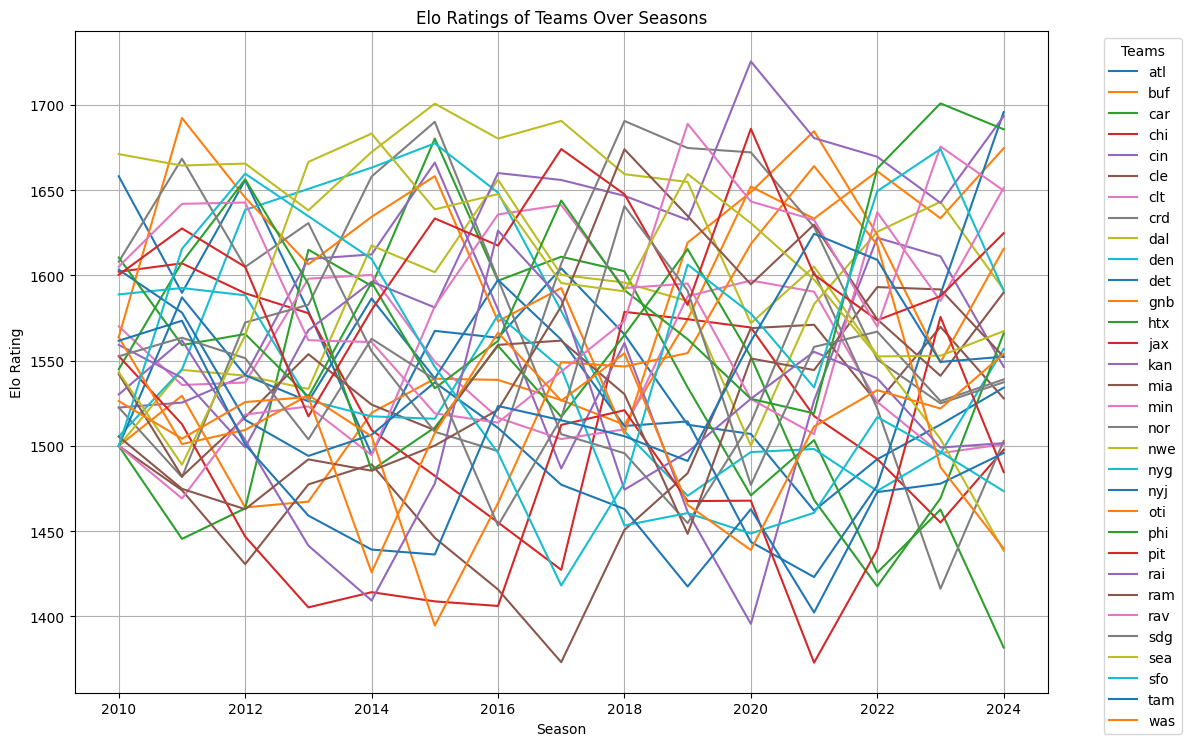

In [ ]:
import matplotlib.pyplot as plt

# Group by team and plot Elo ratings over time
team_elo_df = feature_df.groupby(['Season', 'Team'])['Team_Elo'].max().reset_index()

# Loop through each team and plot its Elo over seasons
plt.figure(figsize=(12, 8))
for team in team_elo_df['Team'].unique():
    team_data = team_elo_df[team_elo_df['Team'] == team]
    plt.plot(team_data['Season'], team_data['Team_Elo'], label=team)

plt.title('Elo Ratings of Teams Over Seasons')
plt.xlabel('Season')
plt.ylabel('Elo Rating')
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


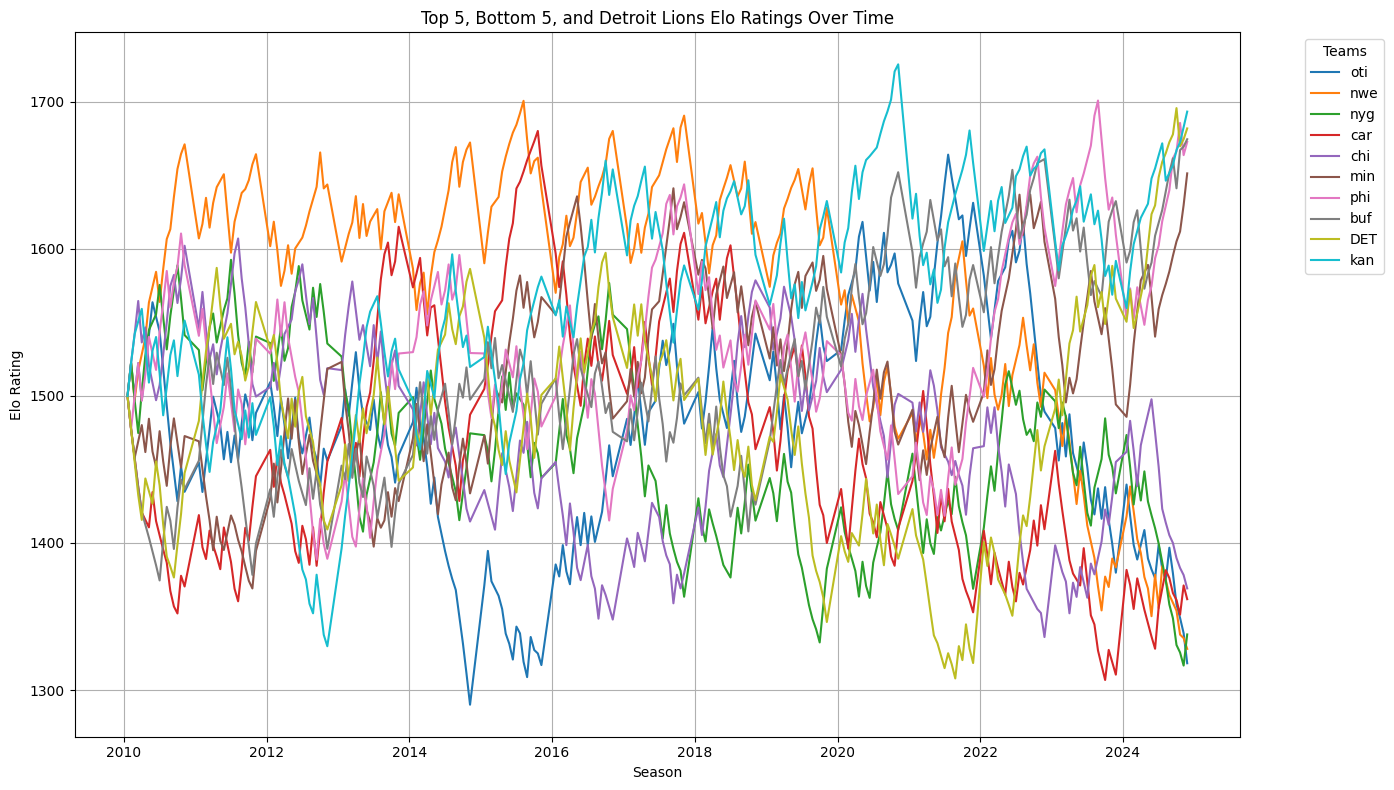

In [ ]:
import matplotlib.pyplot as plt

# Ensure Elo is numeric
feature_df['Team_Elo'] = pd.to_numeric(feature_df['Team_Elo'], errors='coerce')

# Get last season and week
final_season = feature_df['Season'].max()
final_week = feature_df[feature_df['Season'] == final_season]['Week'].max()

# Get final Elo values by team from the last game
final_elos = (
    feature_df[(feature_df['Season'] == final_season) & (feature_df['Week'] == final_week)]
    .groupby('Team')['Team_Elo']
    .mean()
    .sort_values()
)

# Get bottom 5 and top 5 teams
bottom_5 = final_elos.head(5)
top_5 = final_elos.tail(5)

# Always include Detroit Lions
lions_code = 'det'
if lions_code in final_elos.index:
    lions_elo = pd.Series(final_elos[lions_code], index=[lions_code])
else:
    lions_elo = pd.Series()

# Combine and get unique team list
teams_to_plot = pd.concat([bottom_5, top_5, lions_elo]).drop_duplicates().index.tolist()

# Plot Elo ratings over time
plt.figure(figsize=(14, 8))
for team in teams_to_plot:
    team_data = feature_df[feature_df['Team'] == team]
    plt.plot(
        team_data['Season'] + team_data['Week'] / 20,  # smoother x-axis
        team_data['Team_Elo'],
        label=team.upper() if team == 'det' else team
    )

plt.title('Top 5, Bottom 5, and Detroit Lions Elo Ratings Over Time')
plt.xlabel('Season')
plt.ylabel('Elo Rating')
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
lions_history = feature_df[feature_df['Team'] == 'det'][['Season', 'Week', 'Team_Elo']].sort_values(by=['Season', 'Week'])
print(lions_history.to_string(index=False))
feature_df.to_csv('THE_BIG_BOY_DATA2.csv', index=False)

 Season  Week    Team_Elo
   2010     1 1500.000000
   2010     2 1477.500000
   2010     3 1455.000000
   2010     4 1432.687672
   2010     5 1415.701715
   2010     6 1443.887926
   2010     8 1426.710925
   2010     9 1455.486949
   2010    10 1439.180806
   2010    11 1412.541889
   2010    12 1390.737079
   2010    13 1384.021804
   2010    14 1376.520289
   2010    15 1398.835294
   2010    16 1419.632800
   2010    17 1447.586025
   2011     1 1483.027128
   2011     2 1509.115323
   2011     3 1530.266049
   2011     4 1546.550014
   2011     5 1566.654946
   2011     6 1587.120644
   2011     7 1561.619137
   2011     8 1538.934521
   2011    10 1549.077220
   2011    11 1528.325006
   2011    12 1536.887479
   2011    13 1527.164466
   2011    14 1510.469275
   2011    15 1520.240219
   2011    16 1543.521297
   2011    17 1563.912328
   2012     1 1532.187383
   2012     2 1541.475299
   2012     3 1522.494312
   2012     4 1496.792399
   2012     6 1471.278146
   2012     

In [ ]:
# Calculate Point_Diff first
feature_df['Point_Diff'] = feature_df['Pts'] - feature_df['PtsO']
rolling_window = 3

# Calculate rolling point differential for each team WITHOUT groupby-apply
feature_df['Rolling_Point_Diff'] = feature_df.groupby('Team')['Point_Diff'].transform(
    lambda x: x.shift(1).rolling(window=rolling_window, min_periods=2).mean()
)

# Now filter for ATL data
atl_data = feature_df[feature_df['Team'] == 'atl'][['Season', 'Week', 'Team', 'Point_Diff', 'Rolling_Point_Diff']]

first_games = atl_data.groupby('Season').first()
print("First game of each season for ATL:")
print(first_games)

# Let's also check the first few games of each season
print("\nFirst few games of each season for ATL:")
for season, group in atl_data.groupby('Season'):
    print(f"\nSeason {season}:")
    print(group.head(3))

First game of each season for ATL:
        Week Team  Point_Diff  Rolling_Point_Diff
Season                                           
2010       1  atl          -6           14.000000
2011       1  atl         -18           11.333333
2012       1  atl          16            6.333333
2013       1  atl          -6           14.000000
2014       1  atl           3           -3.333333
2015       1  atl           2           -7.333333
2016       1  atl          -7            3.333333
2017       1  atl           6           17.000000
2018       1  atl          -6            1.666667
2019       1  atl         -16           14.000000
2020       1  atl         -13            8.333333
2021       1  atl         -26           -8.000000
2022       1  atl          -1           -6.666667
2023       1  atl          14            2.000000
2024       1  atl          -8          -10.666667

First few games of each season for ATL:

Season 2010:
    Season  Week Team  Point_Diff  Rolling_Point_Diff
16    

In [ ]:
feature_df['Total_Yards'] = feature_df['PassYards'] + feature_df['RushYards']
feature_df['Total_Plays'] = feature_df['PassAttempts'] + feature_df['RushAttempts'] + feature_df['Sacks']  # sacks count as pass plays
feature_df['NYPP'] = feature_df['Total_Yards'] / feature_df['Total_Plays']